# **Purchasing Intention Prediction: An Artificial Neural Network Approach**

This project aims to develop and evaluate an artificial neural network (ANN) model to predict
the purchasing intention of online shoppers using the Online Shoppers Purchasing Intention
Dataset. The model will be developed using Keras, a popular artificial neural network library
with a TensorFlow backend. The dataset contains a variety of features, including demographic
information, product characteristics, and browsing behavior. The model will be trained on the
dataset to learn the relationships between the features and the purchasing intention of online
shoppers.

In [116]:
import numpy as np
import pandas as pd
%matplotlib inline

import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns

from google.colab import drive


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# **Dataset**

In [117]:
!mkdir -p /content/dataset_folder
dataset=pd.read_csv('/content/dataset_folder/dataset.csv')
display(dataset)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [118]:
dataset.sample(30)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
146,0,0.000000,0,0.000000,3,1038.000000,0.000000,0.033333,0.000000,0.0,Feb,2,2,1,1,Returning_Visitor,False,False
5936,0,0.000000,0,0.000000,49,1571.123810,0.004255,0.010638,0.000000,0.0,Jul,2,2,8,4,New_Visitor,True,False
3095,0,0.000000,0,0.000000,42,562.666667,0.009341,0.032584,0.000000,0.0,May,2,2,4,13,Returning_Visitor,False,False
8915,3,50.500000,0,0.000000,2,37.500000,0.000000,0.040000,0.000000,0.0,Nov,2,2,1,2,New_Visitor,False,False
10838,10,130.625000,0,0.000000,20,707.166667,0.000000,0.007222,0.000000,0.0,Nov,4,1,1,3,Returning_Visitor,False,False
3475,0,0.000000,0,0.000000,8,89.500000,0.000000,0.050000,0.000000,0.0,May,2,2,1,1,Returning_Visitor,False,False
7015,4,54.600000,2,22.133333,44,1100.789082,0.008511,0.018561,0.000000,0.0,Oct,2,2,1,1,Returning_Visitor,False,False
2211,0,0.000000,0,0.000000,11,831.933333,0.000000,0.020370,0.000000,0.8,May,3,2,6,14,Returning_Visitor,False,False
8331,0,0.000000,0,0.000000,19,593.750000,0.000000,0.014035,0.000000,0.0,Nov,2,2,1,2,New_Visitor,False,False
6903,1,0.000000,0,0.000000,24,991.422222,0.000000,0.008333,17.622111,0.0,Nov,2,2,4,2,New_Visitor,True,True


In [119]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           


It appears that every cell is occupied, and no values are absent. Additionally, the duration spent on a specific page type typically aligns with the quantity of pages of that type visited. Therefore, I will exclude the count of each page type visited and retain only the duration columns. Furthermore, I will review the column descriptions to grasp the range of each column.

In [120]:
dataset.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [121]:
dataset.select_dtypes(bool).describe().T

,count,unique,top,freq
Weekend,12330,2,False,9462
Revenue,12330,2,False,10422


In [122]:
dataset.select_dtypes(object).describe().T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551


# **Data Cleaning**

In [123]:
dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [124]:
dataset.duplicated().sum()

125

In [125]:
dataset[dataset.duplicated(keep='last')]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
252,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,False,False
286,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,3,2,1,13,Returning_Visitor,False,False
11205,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,8,13,9,20,Other,False,False
11581,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,8,13,9,20,Other,False,False
11801,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False


In [126]:
dataset.drop_duplicates(keep='first', inplace = True)
dataset.duplicated().any()

False

# **Data Exploration (EDA)**

In [127]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.reset_index(inplace = True)
X_test.reset_index(inplace = True)

Text(0.5, 1.0, 'Count of visitors based on revenue generated')

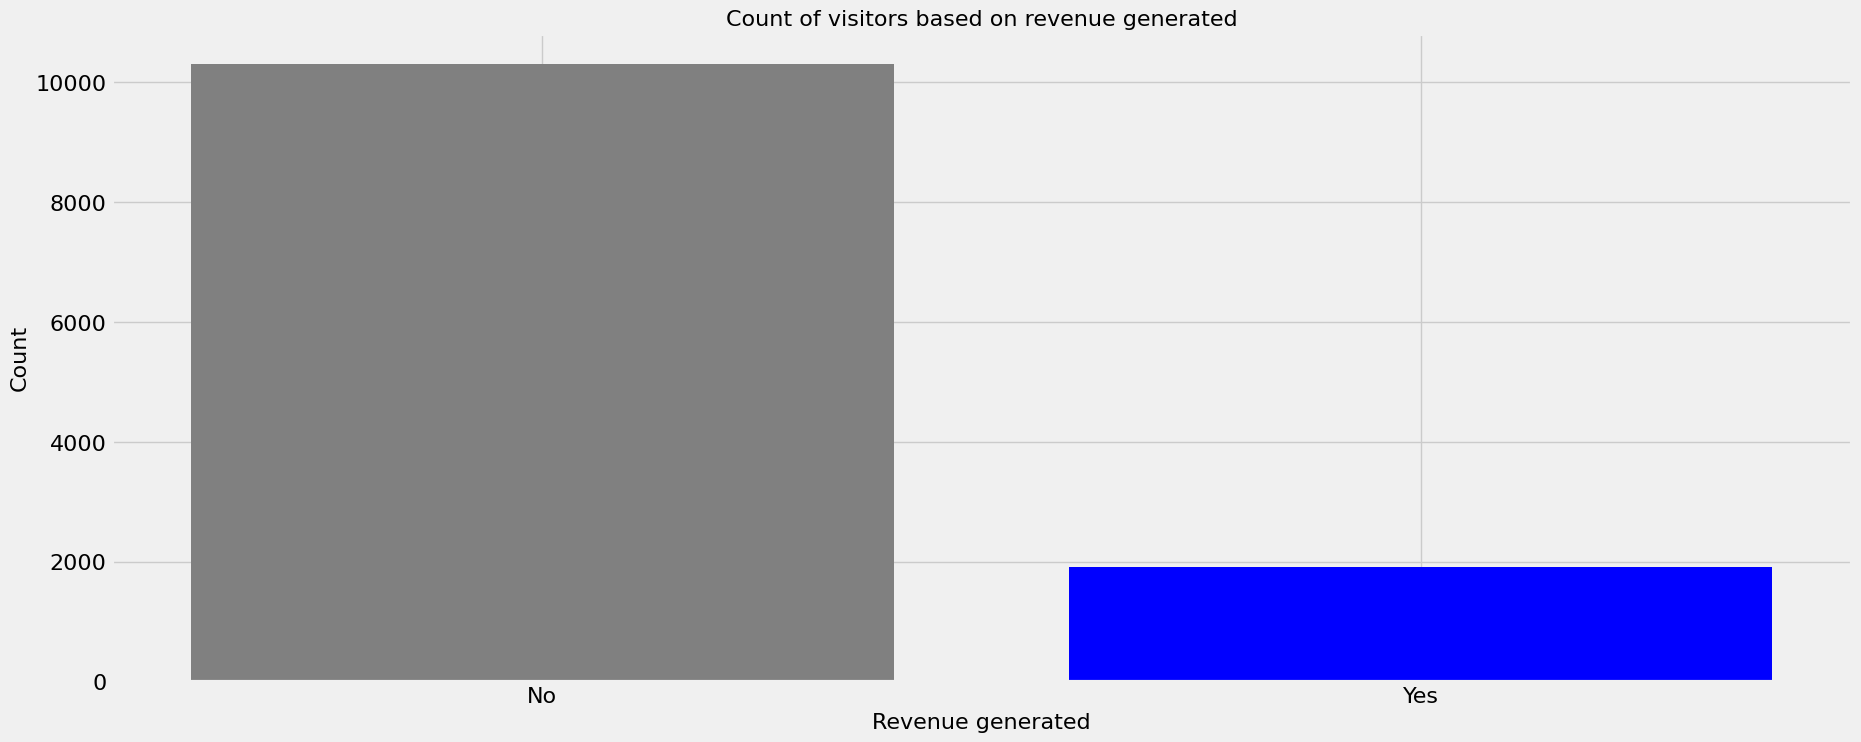

In [128]:
target_distribution = y.value_counts()

plt.figure(figsize = (20, 8))
plt.bar(target_distribution.keys().tolist(), target_distribution.tolist(), color = ['gray', 'blue'])

plt.xlabel('Revenue generated', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks([0.0, 1.0], ['No', 'Yes'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Count of visitors based on revenue generated', fontsize = 16)

As evident from the bar plot presented, the dataset predominantly comprises feature values that did not lead to revenue generation. The dataset exhibits a significant imbalance, requiring the development of an effective model capable of accurately classifying between the two classes.

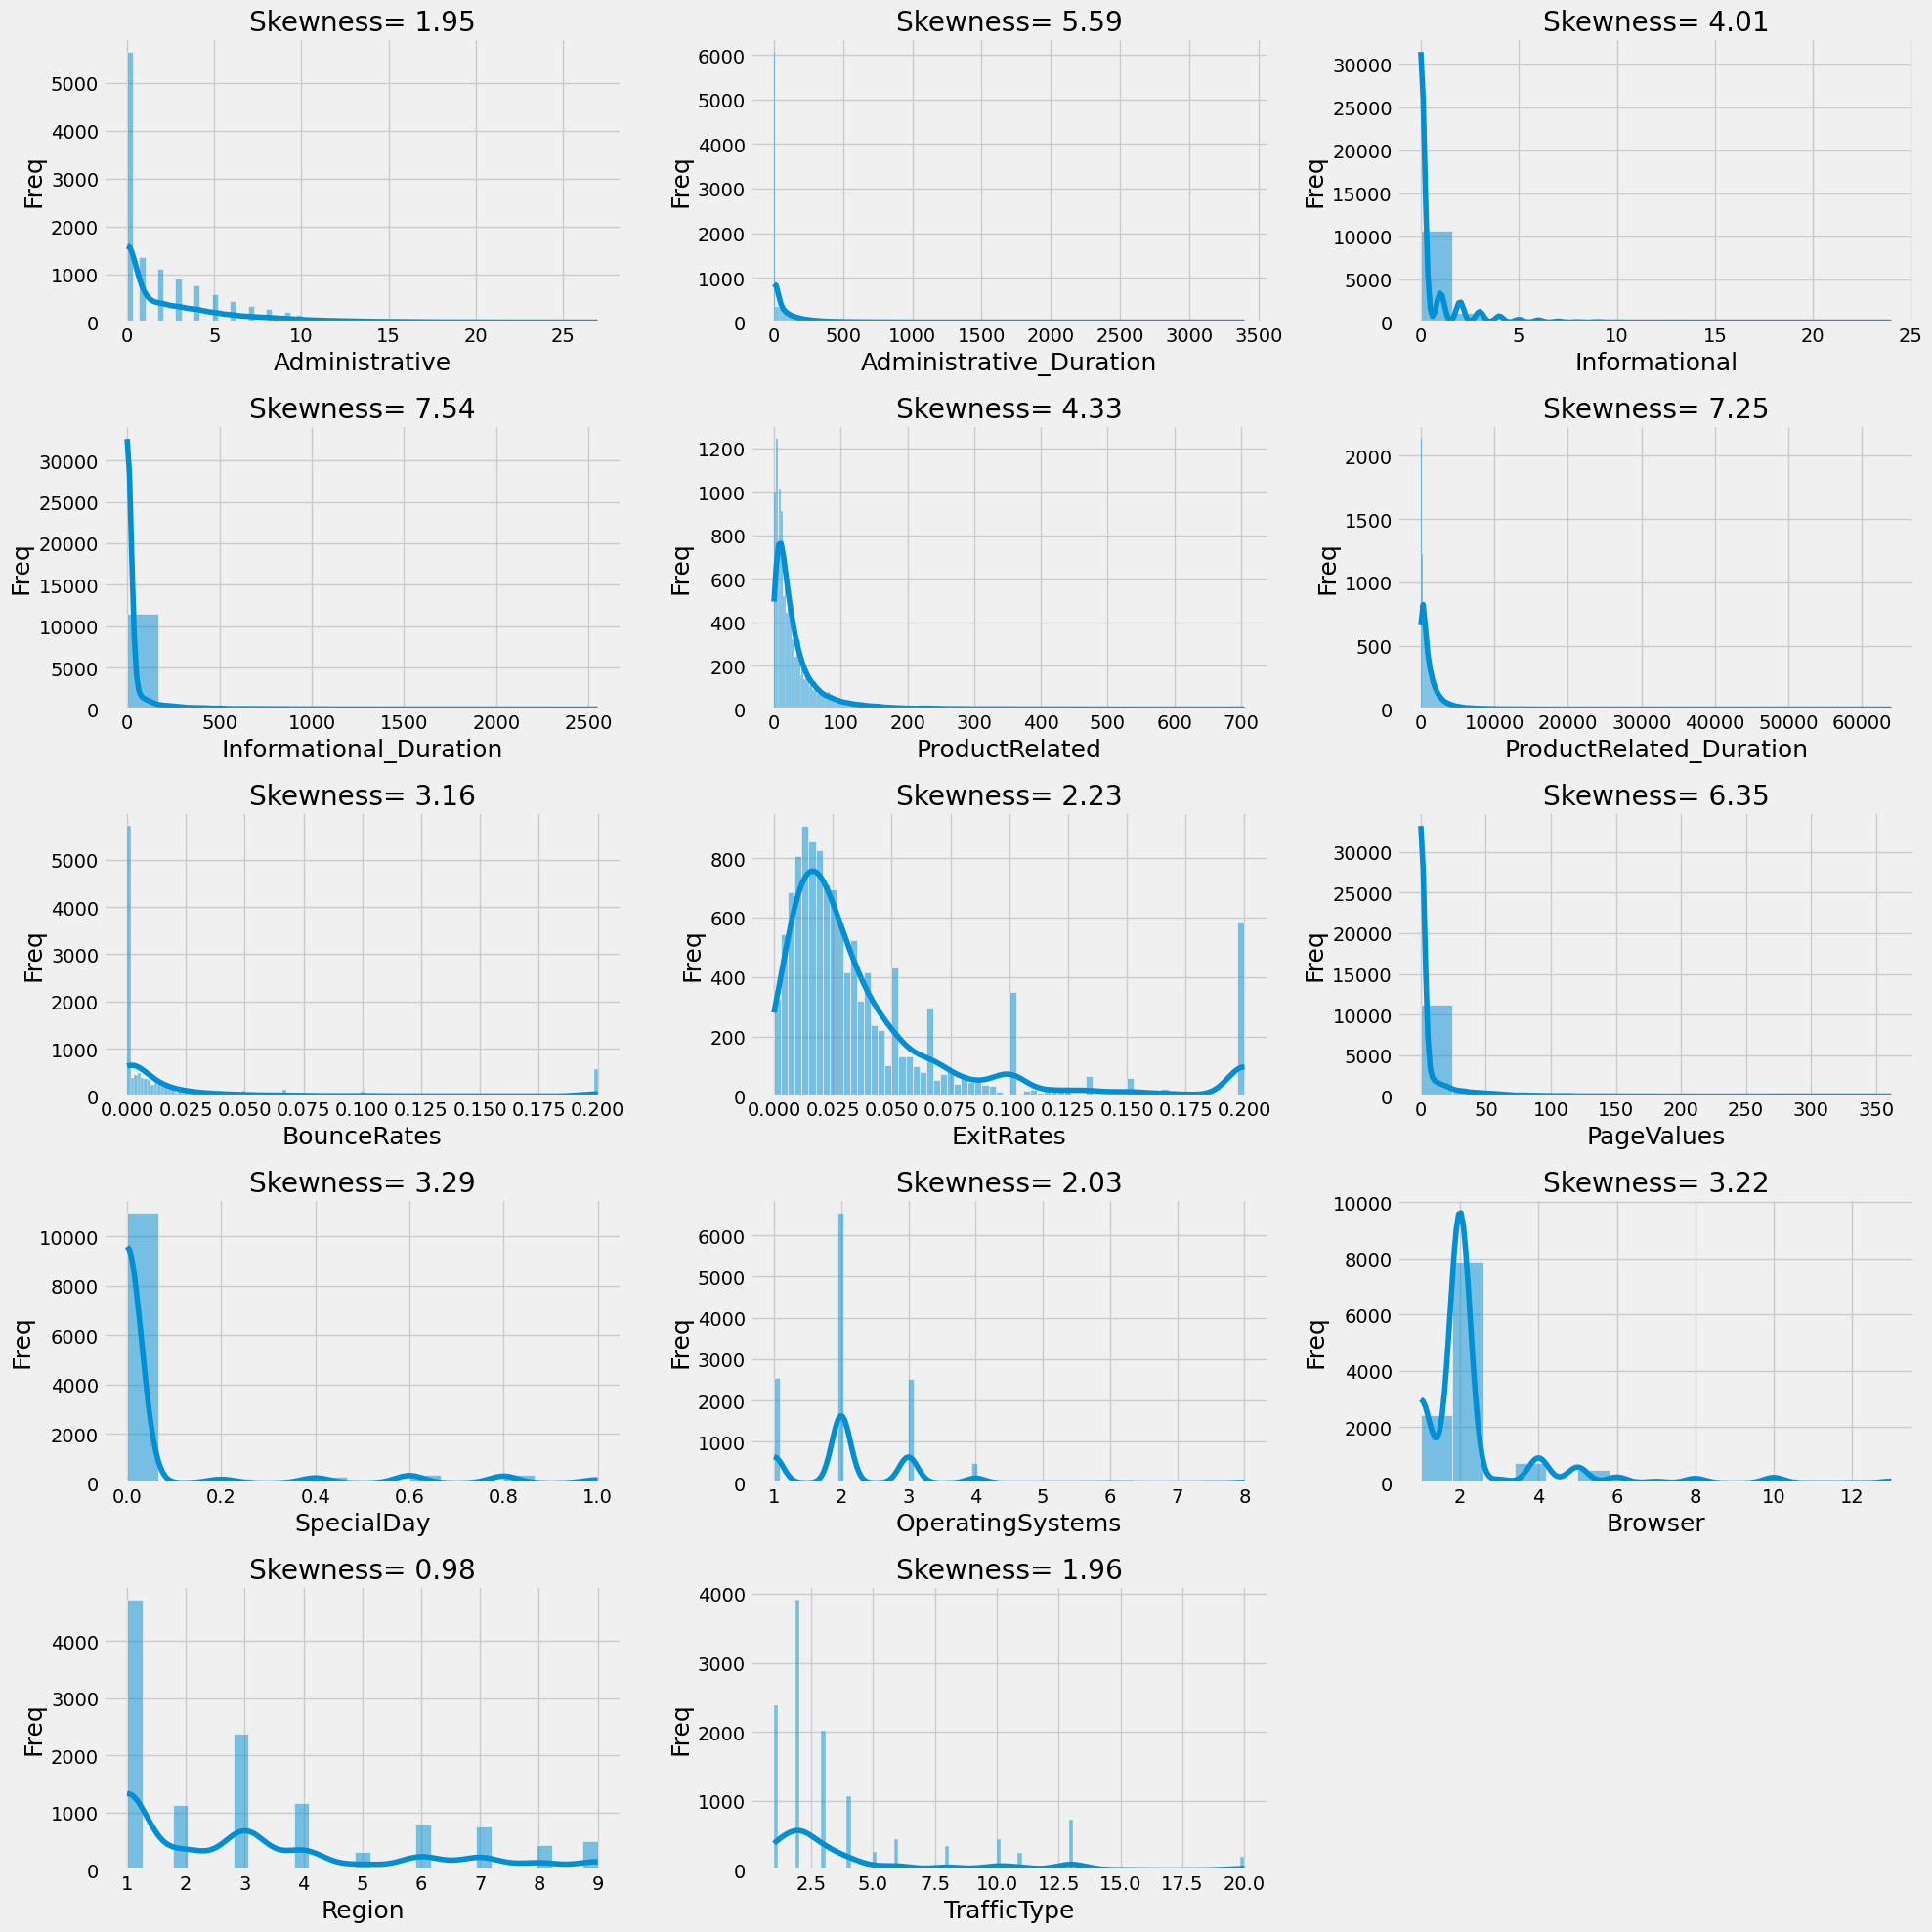

In [129]:
columns_int = dataset.select_dtypes("number").columns.tolist()
len(columns_int)
plt.figure(figsize=(20, 20))
for i in range(len(columns_int)):
    plt.subplot(len(columns_int)//3+1, 3, i+1)
    ax = sns.histplot(
        dataset[columns_int[i]],
        kde = True
    )
    ax.set_xlabel(columns_int[i], fontsize = 18)
    ax.set_ylabel("Freq", fontsize = 18)
    ax.set_title(f"Skewness= {str(round(dataset[columns_int[i]].skew(),2))}")
plt.tight_layout()
plt.show()

Analyzing the histogram presented above reveals the frequency distribution of values within each bin, all of which exhibit positive skewness. This skewness indicates the presence of outliers in the columns. To enhance the model's robustness for future analyses, addressing these outliers is imperative. Consequently, as part of the feature engineering process, we will undertake outlier treatment during the preprocessing step.

The outliers suggest that certain customers have values significantly higher than the majority. A closer examination of the column descriptions reveals that these columns primarily capture details about the frequency and duration of a customer's interaction with specific pages, reflecting user behavior during active sessions on the website. In contrast, the remaining numerical values convey information about how and where users access the website.

The positive skewness in these columns may be attributed to customers who spend extended periods browsing, irrespective of whether they make a purchase. Conversely, in other columns, skewness may result from the popularity of certain software, such as operating systems and browsers.

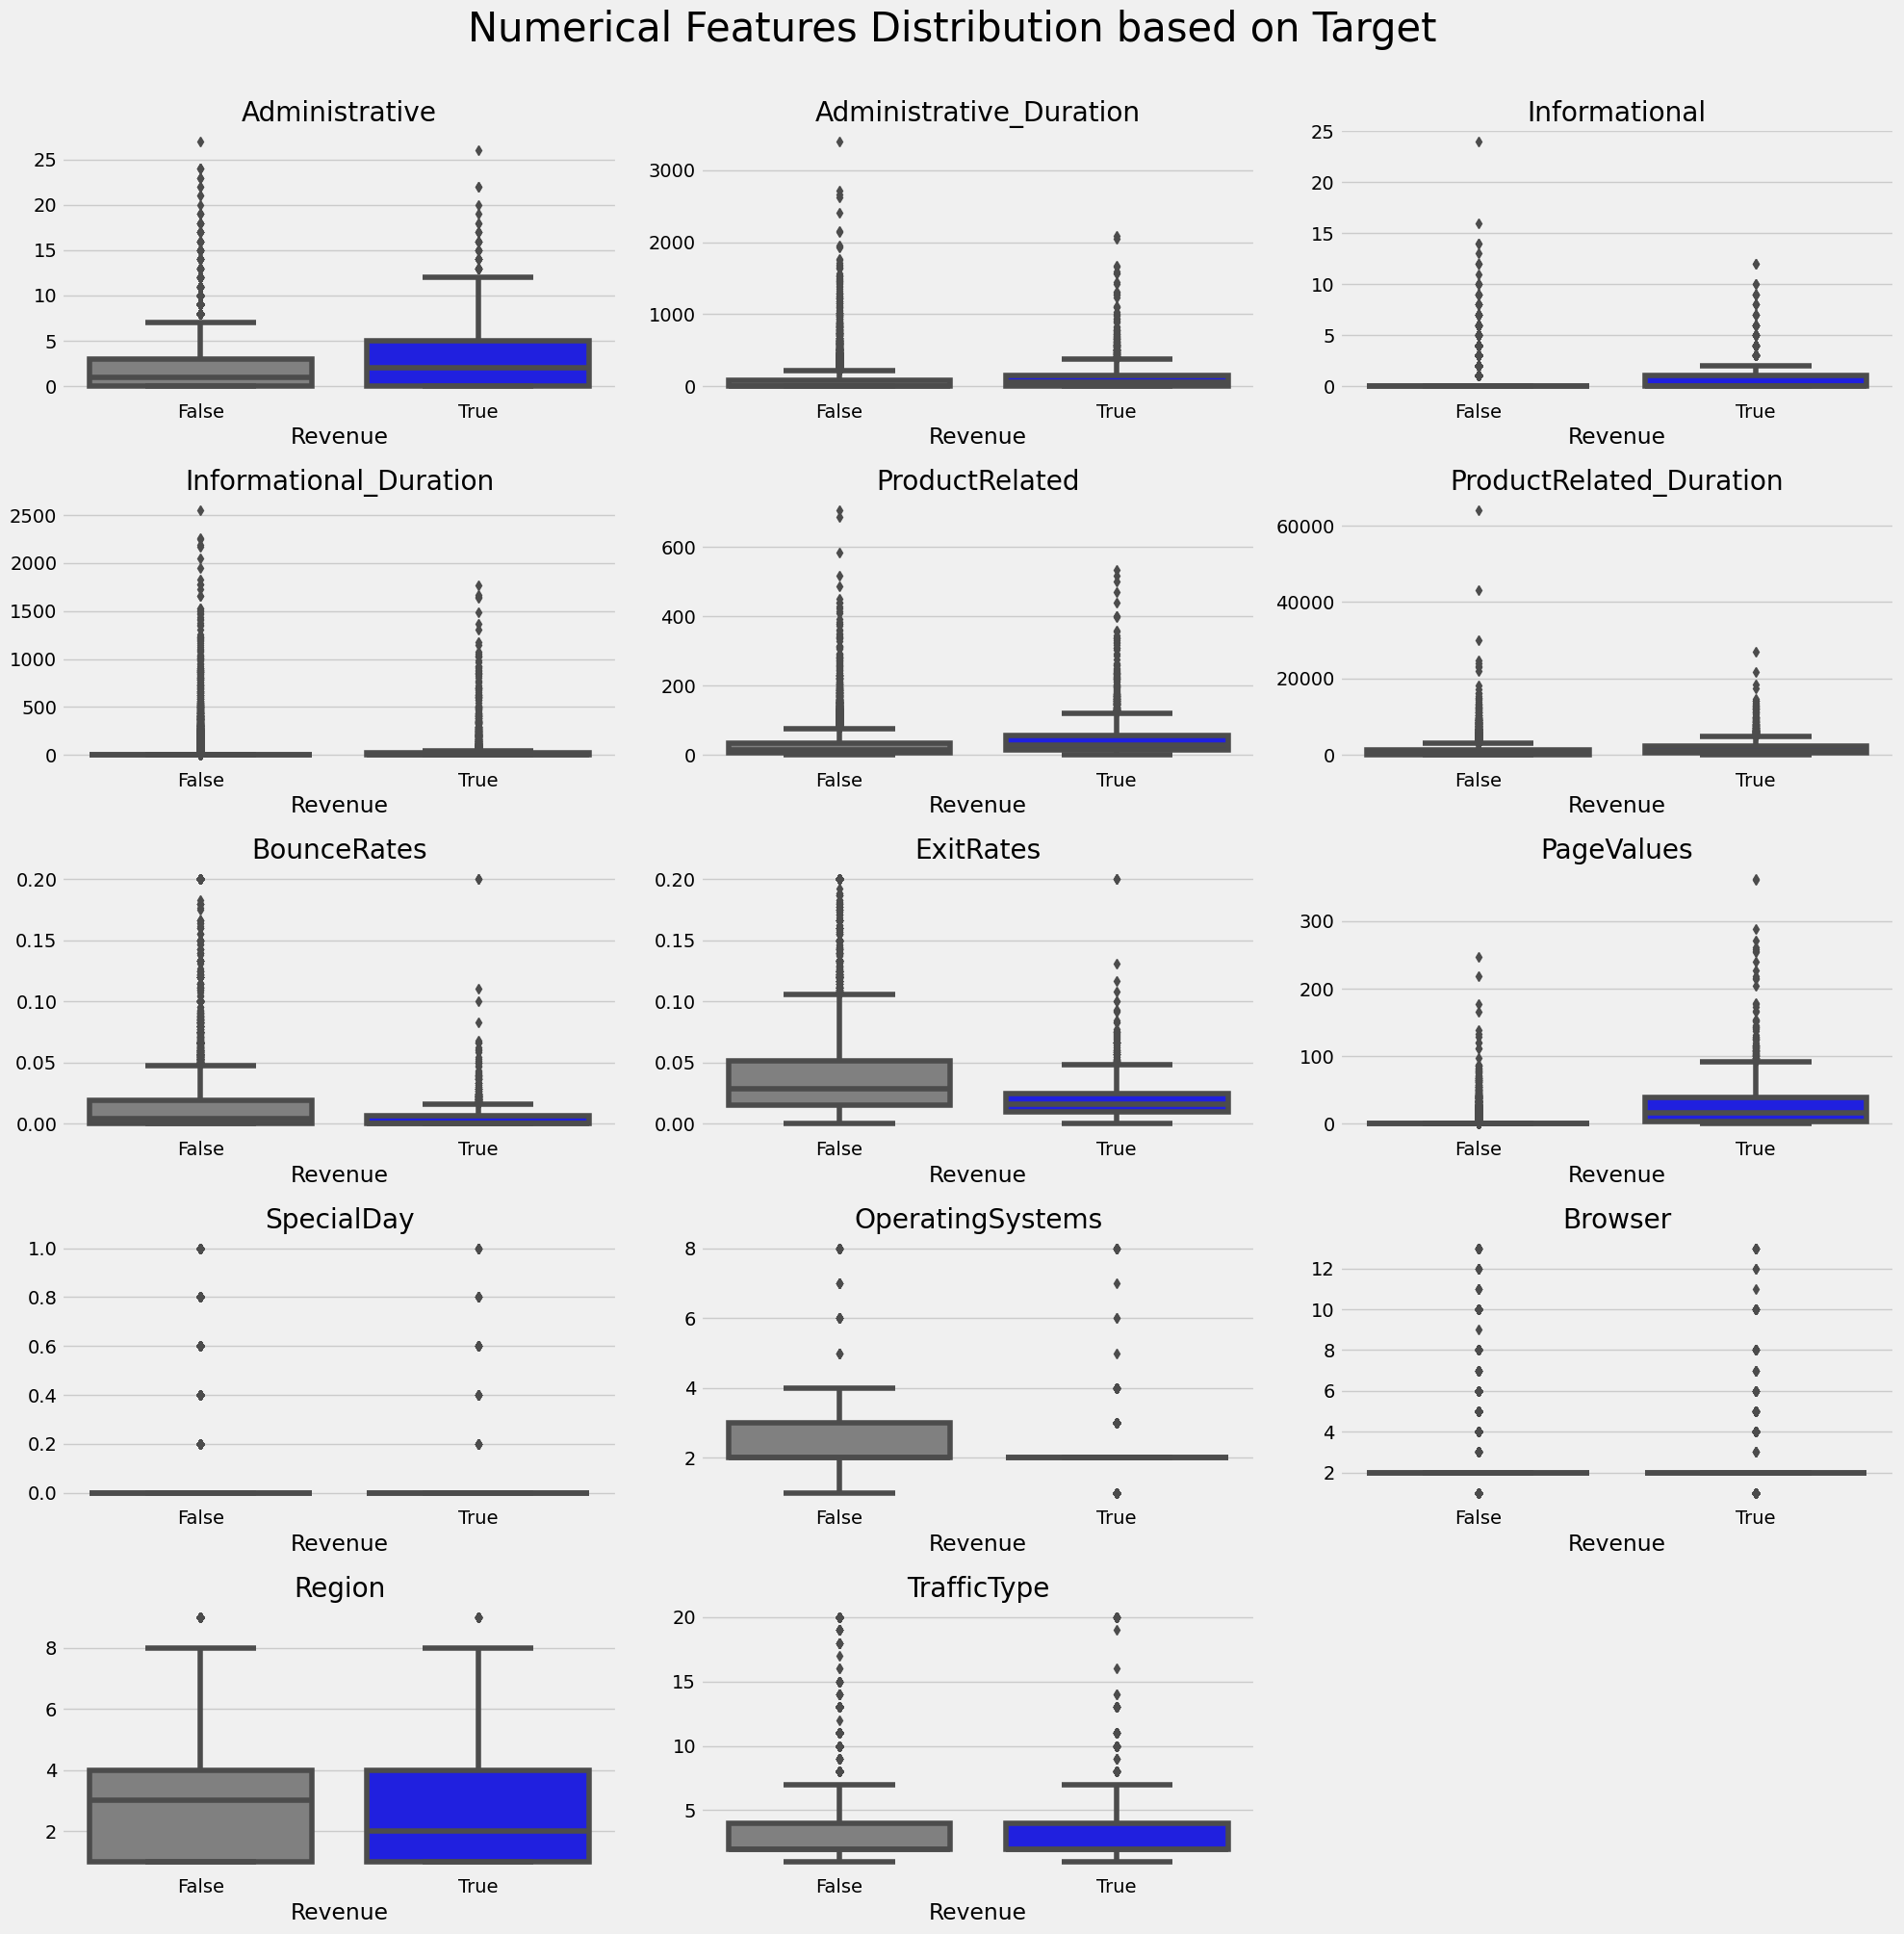

In [130]:
plt.figure(figsize=(20, 20))
plt.suptitle('Numerical Features Distribution based on Target', fontsize = 30, y = 1.005)
for i in range(len(columns_int)):
    plt.subplot(len(columns_int)//3+1, 3, i+1)
    ax = sns.boxplot(
        y = dataset[columns_int[i]],
        x = dataset['Revenue'],
        palette = {True : 'blue', False : 'gray'}
    )
    ax.set_ylabel('')
    ax.set_title(columns_int[i])
plt.tight_layout()
plt.show()

Customers who made purchases tend to exhibit a higher median in the Administrative, Informational, ProductRelated, and PageValues columns. Conversely, they show a lower median in the ExitRates and Region columns.

Additionally, certain values in the dataset, namely OperatingSystems, Browser, Region, and TrafficType, appear to represent nominal variables. As these values cannot be treated as numerical, preprocessing steps will be applied to address them later. This observation also provides valuable insight; it suggests that a significant number of customers who made purchases are using the popular OperatingSystem, considering the limited presence of outliers in this particular feature.

In [131]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.reset_index(inplace = True)
X_test.reset_index(inplace = True)

# **Correlation matrix**

I will analyze the correlation matrix directly without employing a plotting library to generate a correlation plot. To facilitate a swift examination of the output, I'll use the coolwarm colormap (cmap).

In [132]:
corr = dataset.corr()
corr.style.background_gradient(cmap = 'coolwarm')

<ipython-input-132-ffd37e1235a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,-0.006586,-0.025622,-0.007262,-0.034643,0.023825,0.136330
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,-0.007529,-0.015742,-0.006729,-0.014991,0.013259,0.091768
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,-0.009721,-0.038787,-0.030317,-0.035197,0.034359,0.093626
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,-0.009734,-0.019573,-0.027891,-0.025126,0.023193,0.069358
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.004194,-0.013586,-0.040108,-0.044223,0.013477,0.156042
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.002870,-0.007724,-0.034869,-0.037390,0.004903,0.150077
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,0.026811,-0.015501,0.002787,0.089184,-0.034808,-0.145091
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,0.016345,-0.003323,-0.000987,0.087478,-0.053061,-0.204320
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.018632,0.045908,0.010588,0.012286,0.010801,0.491894
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,0.012806,0.003528,-0.016450,0.052856,-0.017723,-0.083601


PageValues emerges as the feature with the highest linear correlation with our target value. Conversely, features like OperatingSystems, Region, and TrafficType exhibit correlations below 0.02, prompting their removal from the dataset.

Furthermore, the strong correlation observed between Administrative and Administrative_Duration, Informational and Informational_Duration, as well as ProductRelated and ProductRelated_Duration is consistent with expectations. The duration spent on a specific type of page is naturally influenced by the number of pages of that type visited. Consequently, it is advisable to eliminate the count of pages visited for each type from the dataset.

# **Data engineering**

In [133]:
X_train = X_train.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)
X_test = X_test.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)
X_train.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)
X_test.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)

In [134]:
labelEncoder = LabelEncoder()
X_train.loc[:, 'Month'] = labelEncoder.fit_transform(X_train.loc[:, 'Month'])
X_test.loc[:, 'Month'] = labelEncoder.transform(X_test.loc[:, 'Month'])
X_train.loc[:, 'VisitorType'] = labelEncoder.fit_transform(X_train.loc[:, 'VisitorType'])
X_test.loc[:, 'VisitorType'] = labelEncoder.transform(X_test.loc[:, 'VisitorType'])
X_train.loc[:, 'Weekend'] = labelEncoder.fit_transform(X_train.loc[:, 'Weekend'])
X_test.loc[:, 'Weekend'] = labelEncoder.transform(X_test.loc[:, 'Weekend'])
onehotencoder = OneHotEncoder(categories = 'auto', drop = 'first')
train_cat_features = onehotencoder.fit_transform(X_train.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
train_cat_features = pd.DataFrame(train_cat_features)
test_cat_features = onehotencoder.transform(X_test.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
test_cat_features = pd.DataFrame(test_cat_features)
train_cat_features.columns = train_cat_features.columns.astype(str)
test_cat_features.columns = test_cat_features.columns.astype(str)


# X_train.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
# X_train = X_train.join(train_cat_features)
# X_test.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
# X_test = X_test.join(test_cat_features)

# Drop original categorical columns and join one-hot encoded columns
X_train.drop(['Month', 'Browser', 'VisitorType'], axis=1, inplace=True)
X_train = pd.concat([X_train, train_cat_features], axis=1)

X_test.drop(['Month', 'Browser', 'VisitorType'], axis=1, inplace=True)
X_test = pd.concat([X_test, test_cat_features], axis=1)



<ipython-input-134-c47847d209e1>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:, 'Month'] = labelEncoder.fit_transform(X_train.loc[:, 'Month'])
<ipython-input-134-c47847d209e1>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.loc[:, 'Month'] = labelEncoder.transform(X_test.loc[:, 'Month'])
<ipython-input-134-c47847d209e1>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.colum

In [135]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np

In [136]:

# classifier = Sequential()
# classifier.add(Dense(units = 128, activation = 'relu', input_dim = 32))
# classifier.add(Dropout(rate = 0.6))
# classifier.add(Dense(units = 128, activation = 'relu'))
# classifier.add(Dropout(rate = 0.6))
# classifier.add(Dense(units = 256, activation = 'relu'))
# classifier.add(Dropout(rate = 0.6))
# classifier.add(Dense(units = 128, activation = 'relu'))
# classifier.add(Dropout(rate = 0.4))
# classifier.add(Dense(units = 1, activation = 'sigmoid'))
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# classifier.summary()

In [137]:
# history = classifier.fit(X_train, y_train, epochs = 50, shuffle = False, validation_split = 0.1)

In [138]:
# # Assuming X_train is your training data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# # Apply the same scaler to the test data
# X_test_scaled = scaler.transform(X_test)
# y_pred = classifier.predict(X_test)
# y_pred = y_pred > 0.5

# print("Confusion matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

In [139]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, BatchNormalization
# from keras.callbacks import LearningRateScheduler, EarlyStopping
# from sklearn.metrics import confusion_matrix, accuracy_score

# # Define the model
# classifier = Sequential()
# classifier.add(Dense(units=128, activation='relu', input_dim=32))
# classifier.add(BatchNormalization())
# classifier.add(Dropout(rate=0.6))

# classifier.add(Dense(units=128, activation='relu'))
# classifier.add(BatchNormalization())
# classifier.add(Dropout(rate=0.6))

# classifier.add(Dense(units=256, activation='relu'))
# classifier.add(BatchNormalization())
# classifier.add(Dropout(rate=0.6))

# classifier.add(Dense(units=128, activation='relu'))
# classifier.add(BatchNormalization())
# classifier.add(Dropout(rate=0.4))

# classifier.add(Dense(units=1, activation='sigmoid'))

# # Compile the model
# classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# classifier.summary()

# # Define a learning rate schedule function
# def lr_schedule(epoch):
#     lr = 0.001
#     if epoch > 30:
#         lr *= 0.5
#     return lr

# # Use LearningRateScheduler and EarlyStopping during model training
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# history = classifier.fit(X_train, y_train, epochs=50, shuffle=False,
#                           validation_split=0.1, callbacks=[LearningRateScheduler(lr_schedule), early_stopping])

# # Make predictions on the test set
# y_pred = classifier.predict(X_test)
# y_pred = y_pred > 0.5

# # Evaluate the model
# print("Confusion matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


# **Model generation - Training and evaluating the model**
I'll create the Artificial Neural Network now. I'll create network with many layers.

In [140]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import LearningRateScheduler, EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score

# Define a more complex model
classifier = Sequential()

classifier.add(Dense(units=256, activation='relu', input_dim=32))
classifier.add(BatchNormalization())
classifier.add(Dropout(rate=0.6))

classifier.add(Dense(units=256, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(rate=0.6))

classifier.add(Dense(units=512, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(rate=0.6))

classifier.add(Dense(units=256, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(rate=0.4))

classifier.add(Dense(units=128, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(rate=0.4))

classifier.add(Dense(units=64, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(rate=0.4))

classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

# Define a learning rate schedule function
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 30:
        lr *= 0.5
    return lr

# Use LearningRateScheduler and EarlyStopping during model training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = classifier.fit(X_train, y_train, epochs=50, shuffle=False,
                          validation_split=0.1, callbacks=[LearningRateScheduler(lr_schedule), early_stopping])

# Make predictions on the test set
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

# Evaluate the model
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               8448      
                                                                 
 batch_normalization_18 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_19 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_19 (Dropout)        (None, 256)              

True Positives (TP): 145 instances where the model correctly predicted a purchase.
True Negatives (TN): 2032 instances where the model correctly predicted no purchase.
False Positives (FP): 47 instances where the model incorrectly predicted a purchase.
False Negatives (FN): 217 instances where the model incorrectly predicted no purchase.

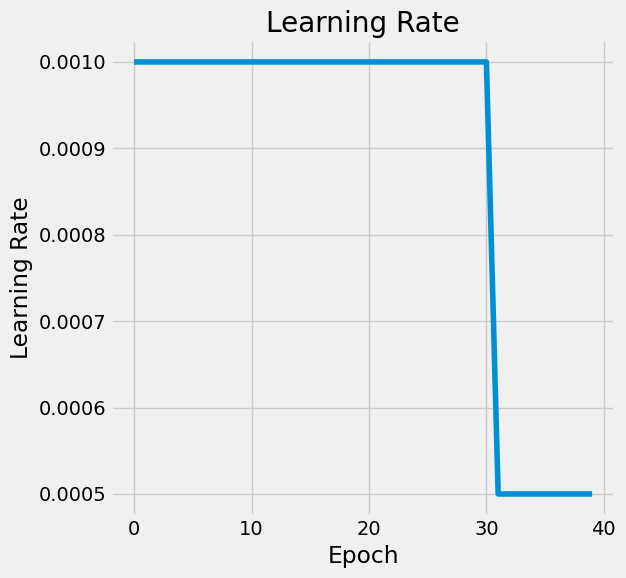

In [141]:
def plot_history(history):
    plt.figure(figsize=(18, 6))



    # Plot learning rate values
    plt.subplot(1, 3, 3)
    plt.plot([lr_schedule(epoch) for epoch in range(len(history.history['accuracy']))])
    plt.title('Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')

    plt.tight_layout()
    plt.show()

# Plot training history
plot_history(history)

In [142]:
# Print classification report

from sklearn.metrics import classification_report


print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2079
        True       0.76      0.40      0.52       362

    accuracy                           0.89      2441
   macro avg       0.83      0.69      0.73      2441
weighted avg       0.88      0.89      0.88      2441



The classification report provides a more detailed evaluation of the model's performance,
including metrics such as precision, recall, and F1-score. Let's break down the key components
of the classification report.

**Precision:** Precision is the ratio of true positives to the sum of true positives and false positives.
It measures the accuracy of positive predictions. In your classification report:
Precision for "False" (No Purchase) is 0.90, indicating that 90% of predicted purchases were
correct. Precision for "True" (Purchase) is 0.76, indicating that 76% of predicted purchases
were correct.

**Recall (Sensitivity):** Recall is the ratio of true positives to the sum of true positives and false
negatives. It measures the ability of the model to capture all relevant instances.
Recall for "False" is 0.98, indicating that 98% of actual purchases were correctly predicted.
Recall for "True" is 0.40, indicating that only 40% of actual purchases were captured by the
model.

**F1-Score:** The F1-score is the harmonic mean of precision and recall. It provides a balance
between precision and recall.
F1-score for "False" is 0.94, reflecting a good balance between precision and recall.
F1-score for "True" is 0.52, indicating a moderate balance between precision and recall.

**Support:** Support represents the number of actual occurrences of each class in the specified
dataset. Support for "False" is 2079, and for "True" is 362.

**Accuracy:** Accuracy is the ratio of correct predictions to the total number of predictions.
The overall accuracy is 0.89 (89%), indicating that the model correctly predicted 89% of
instances.

**Macro Avg and Weighted Avg:** Macro Avg calculates the average of metrics for each class
without considering class imbalance. Weighted Avg considers the support (number of
instances) for each class, providing a weighted average that accounts for class imbalance.
The weighted average for precision, recall, and F1-score is higher because it considers the
imbalance in class distribution

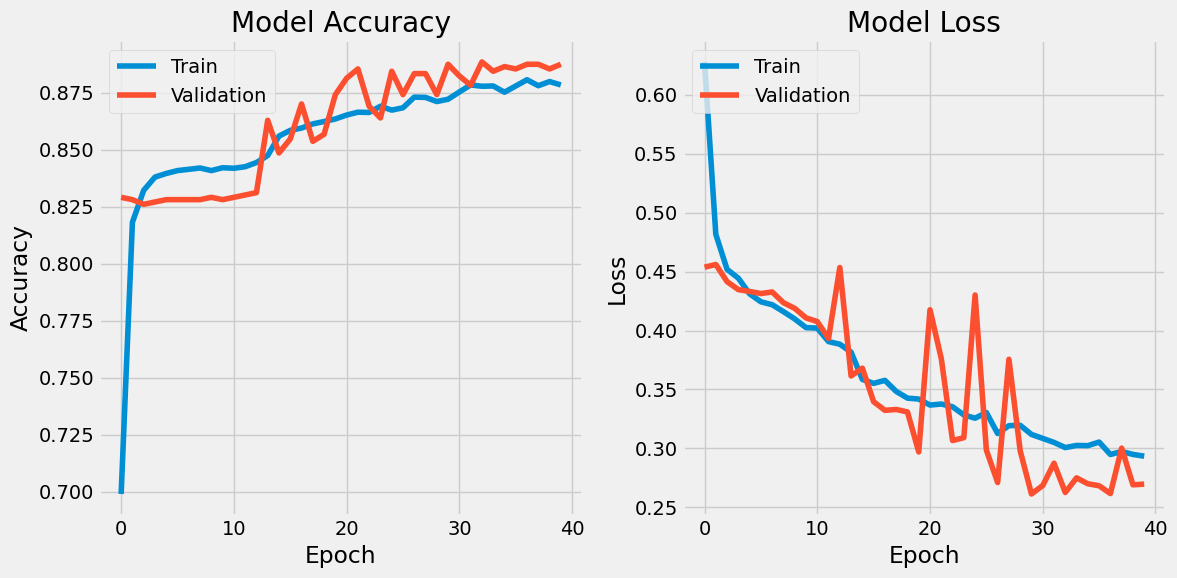

In [143]:
import matplotlib.pyplot as plt



# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot training history
plot_history(history)

Accuracy became stable after the 30th epoch. Therefore, 50 epochs were
sufficient.

# **Interpretation**
The model performs well in predicting instances where there is no purchase ("False"), with
high precision, recall, and F1-score. For predicting purchases ("True"), the model has lower
precision and recall, suggesting that it may not capture all actual purchase instances and may
have some false positives.


# **Conclusion**
In summary, while the model has a high overall accuracy, it's essential to consider the specific business goals and requirements. Depending on the context, you might prioritize precision, recall, or a balance between the two. Adjustments to the model or its threshold might be considered based on these considerations.

The purchasing prediction model exhibits a commendable overall accuracy of 89.18%, with a notable precision, recall, and F1-score for instances where users do not make a purchase. However, the model shows room for improvement in capturing all instances of actual purchases, as reflected by lower precision and recall for this class. The business implications highlight the model's effectiveness in minimizing false positives for non-purchases, while recommendations include further fine-tuning of the model, hyperparameter optimization, and consideration of business priorities when interpreting metrics. Future work could explore additional features or model architectures to enhance predictive performance in identifying purchase instances.
